In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing filterwarnings to ignore warning messages**

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Import Required Library**

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro, bartlett
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson

**Importing Dataset**

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Projects/Ice-Cream Price Prediction/IceCreamData.csv")

In [5]:
data

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


**Data Pre-Processing**

**Creating a copy of original dataset**



In [6]:
df = data.copy()

In [7]:
df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [8]:
df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


**To Find Data type and missing values in data**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB




1.   No missing values present in the data set.
2.   Independent variable(Temperature) is of float data type where as dependent variable(Revenue) are of integer data type.




In [10]:
df.shape

(500, 2)

In [11]:
df.size

1000

**Descriptive statistics**

In [12]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000




*   describe() function tell us five number summary that is min, max, quartile, mean, count.




**Finding Missing values in data set if any**

In [13]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64



*   Here we can see that, there are no missing values present in data



**Correlation**

In [14]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000




*   Independent variable is Highly Correlated with dependent variable with the value of correlation 0.98



**Data Visualization**

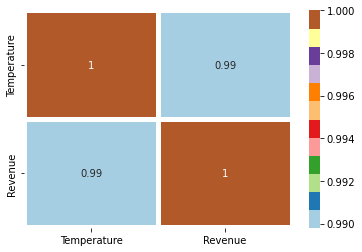

In [15]:
sns.heatmap(data.corr(), 
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

**Checking Assumption of Linear Regression**

**Checking Normality using Shapiro-Wilk Test**

In [16]:
shapiro(df['Revenue'])

(0.9967576265335083, 0.4173350930213928)

**Since p-value > 0.05, we can say that our data is normally distributed**

**Linearity**


> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable



Text(0, 0.5, 'Revenue')

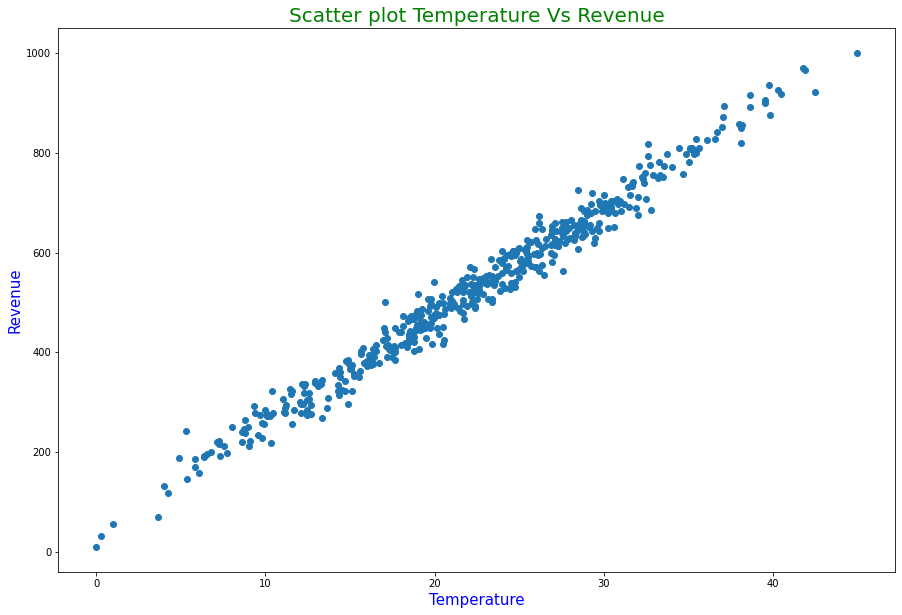

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(df["Temperature"], df["Revenue"])
plt.title("Scatter plot Temperature Vs Revenue", size = 20, color = "Green")
plt.xlabel("Temperature", size = 15, color = "Blue")
plt.ylabel("Revenue", size = 15, color = "Blue")

**From Scatter Plot We can observe that there is a positive linear correlation between Temperature and Revenue.**

Text(0, 0.5, 'Revenue')

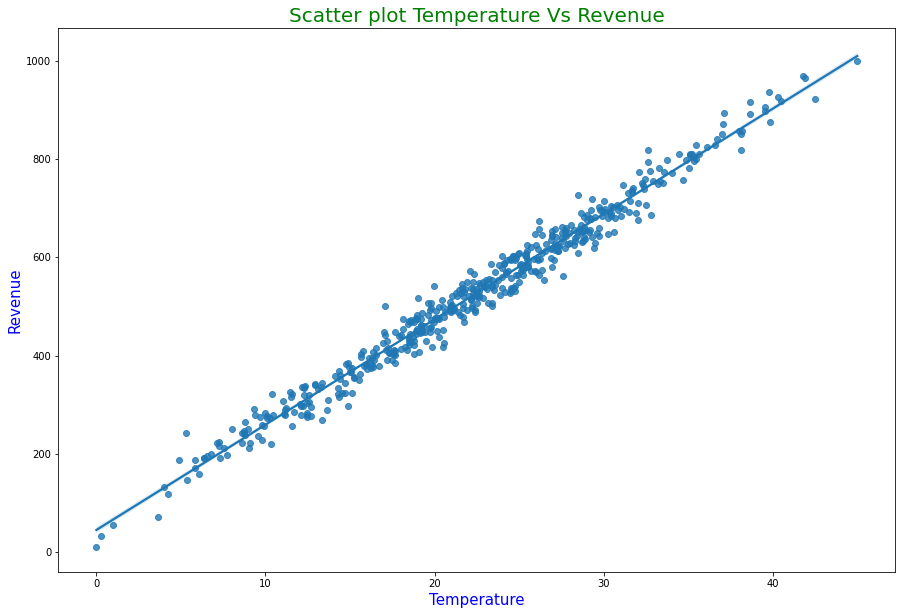

In [18]:
plt.figure(figsize=(15,10))
sns.regplot(x = "Temperature", y = "Revenue", data = df ) 
plt.title("Scatter plot Temperature Vs Revenue", size = 20, color = "Green")
plt.xlabel("Temperature", size = 15, color = "Blue")
plt.ylabel("Revenue", size = 15, color = "Blue")

**Data Prepration**

**Dividing the data frame to independent and dependent variable**

In [19]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [20]:
x

array([[24.56688442],
       [26.00519115],
       [27.79055388],
       [20.59533505],
       [11.50349764],
       [14.35251388],
       [13.70777988],
       [30.83398474],
       [ 0.97686999],
       [31.66946458],
       [11.45525338],
       [ 3.66466958],
       [18.81182403],
       [13.62450892],
       [39.53990899],
       [18.48314099],
       [25.93537514],
       [42.51528041],
       [29.58948056],
       [21.77594799],
       [25.45783637],
       [15.21456942],
       [22.61931574],
       [16.25872074],
       [23.88172478],
       [18.97830025],
       [15.6614643 ],
       [29.18504465],
       [19.02461092],
       [35.12015142],
       [24.18393726],
       [15.23119012],
       [ 8.79095281],
       [18.23322784],
       [35.62892497],
       [37.05754246],
       [22.28455032],
       [17.51707397],
       [31.7379196 ],
       [17.04973761],
       [23.0034888 ],
       [ 8.75555394],
       [18.77535808],
       [14.10966102],
       [18.63391286],
       [15

In [21]:
y

array([ 534.7990284 ,  625.1901215 ,  660.6322888 ,  487.7069603 ,
        316.2401944 ,  367.9407438 ,  308.8945179 ,  696.7166402 ,
         55.39033824,  737.8008241 ,  325.9684084 ,   71.16015301,
        467.4467066 ,  289.5409341 ,  905.4776043 ,  469.9090332 ,
        648.2099977 ,  921.508275  ,  649.5611747 ,  534.6228653 ,
        612.1539491 ,  353.3256334 ,  524.2361154 ,  374.231135  ,
        523.1245467 ,  473.6043349 ,  402.4553204 ,  679.3177906 ,
        517.5340283 ,  809.6720534 ,  528.3804165 ,  356.0980075 ,
        237.7639106 ,  418.1372788 ,  809.4634112 ,  870.7659159 ,
        550.2785159 ,  405.6614459 ,  740.9356848 ,  501.7329901 ,
        539.6880057 ,  242.2362083 ,  421.621505  ,  358.0028493 ,
        467.631063  ,  396.9356482 ,  500.9250645 ,  651.8615363 ,
        451.4507843 ,  697.8339862 ,  190.7109408 ,  621.1897304 ,
        666.1368355 ,  628.4532107 ,  219.3039932 ,  623.5988607 ,
        749.3671543 ,  827.6848313 ,  303.7343815 ,  351.28886

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

**Spliting the X,Y into train and test**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, random_state=0) 

**Training the Algorithm**

In [24]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Successfully Completed")

Training Successfully Completed


In [25]:
regressor.score(x_train,y_train)

0.978604474636004

**Visualizing training data**

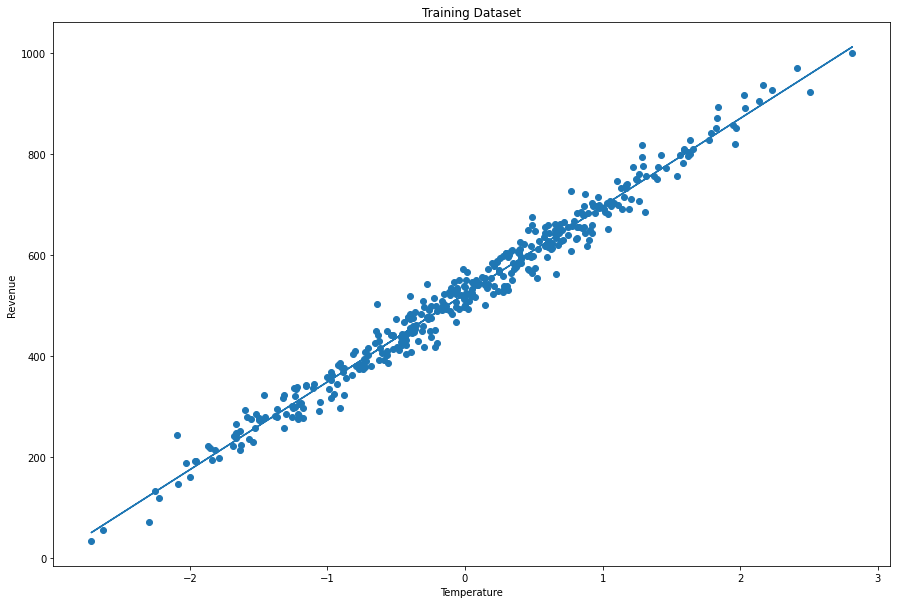

0.978604474636004

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(x_train,y_train)
plt.title('Training Dataset')
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

regressor.score(x_train,y_train) 

**Visualizing test data**

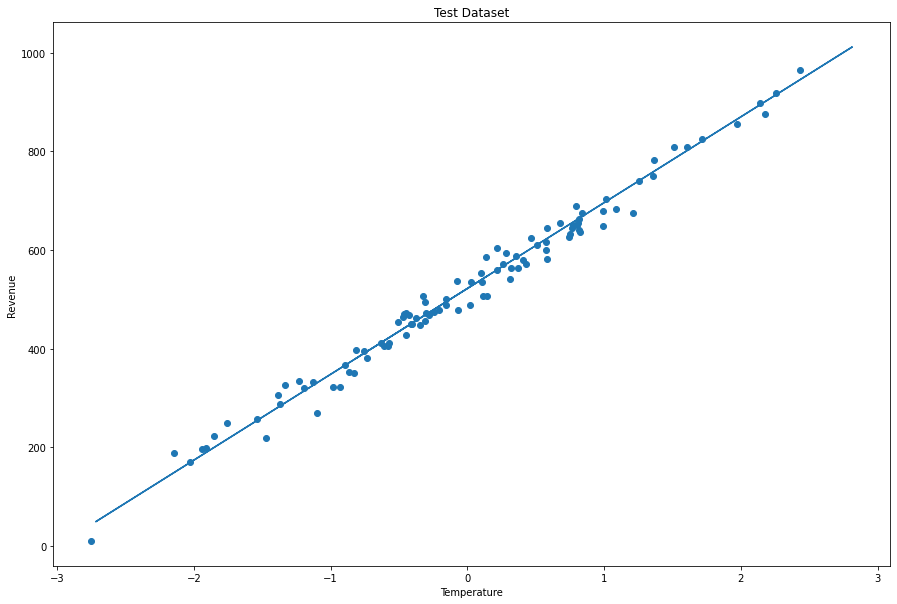

0.9837324255882576

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(x_test,y_test)
plt.title('Test Dataset')
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()
regressor.score(x_test,y_test)

In [28]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.978604474636004
Test Score: 0.9837324255882576


**Plotting the regression line**

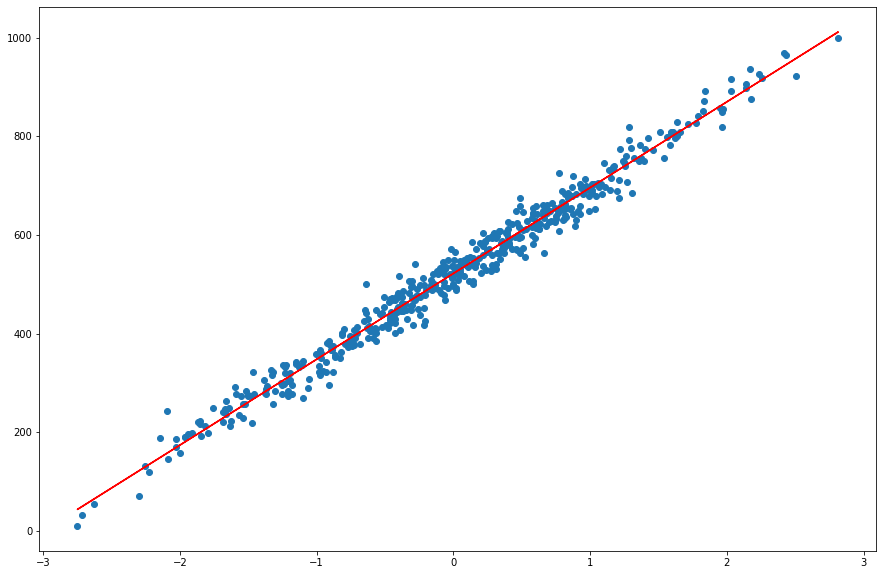

In [53]:
best_fitline = regressor.coef_*X+regressor.intercept_
plt.figure(figsize=(15,10))
plt.scatter(X, y)
plt.plot(X, best_fitline, color = 'Red');
plt.show()

In [30]:
print('Intercept is :',regressor.intercept_)
print('Coefficient is :',regressor.coef_)

Intercept is : 522.024125963185
Coefficient is : [174.00648128]


In [31]:
y_predic = regressor.predict(x_test)
y_predic

array([698.3385558 , 653.32331149, 664.73027451, 450.5192845 ,
       665.47469743, 441.36861407, 584.06540609, 623.82532723,
       667.48717467, 468.72433832, 546.82733151, 443.41191785,
       622.95162777, 377.64639971, 367.0607334 , 945.67057977,
       893.79551974, 694.45445099, 546.05047608, 420.58523672,
       391.08500303, 597.0141581 , 283.23582775, 655.50055011,
       380.98796154, 412.31810124, 371.05055651, 510.23910289,
       479.70270426, 456.68206658, 640.1157508 , 281.65224383,
       314.1894674 , 470.01363777, 559.72453055, 539.75091165,
       307.72368191, 508.65180339, 571.43237276, 732.25599161,
       440.44010989, 494.39422767, 567.56536766, 443.94181482,
       914.46632525, 603.19341879, 541.83315574, 199.94980451,
       694.04258508, 351.09960842, 189.49123987, 576.80689646,
       216.55393778, 468.15141951, 461.80905978, 448.43970076,
       494.89418532, 801.3758273 , 331.24527072, 540.42751209,
       661.1953557 , 526.66690494, 360.66507037, 451.46

In [32]:
df1 = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': y_predic})    
df1

,Actual Revenue,Predicted Revenue
0,704.281439,698.338556
1,632.901914,653.323311
2,662.558990,664.730275
3,449.813300,450.519285
4,636.298374,665.474697
...,...,...
95,506.222379,465.780600
96,749.367154,758.745585
97,684.158444,711.301255
98,381.564135,394.456810


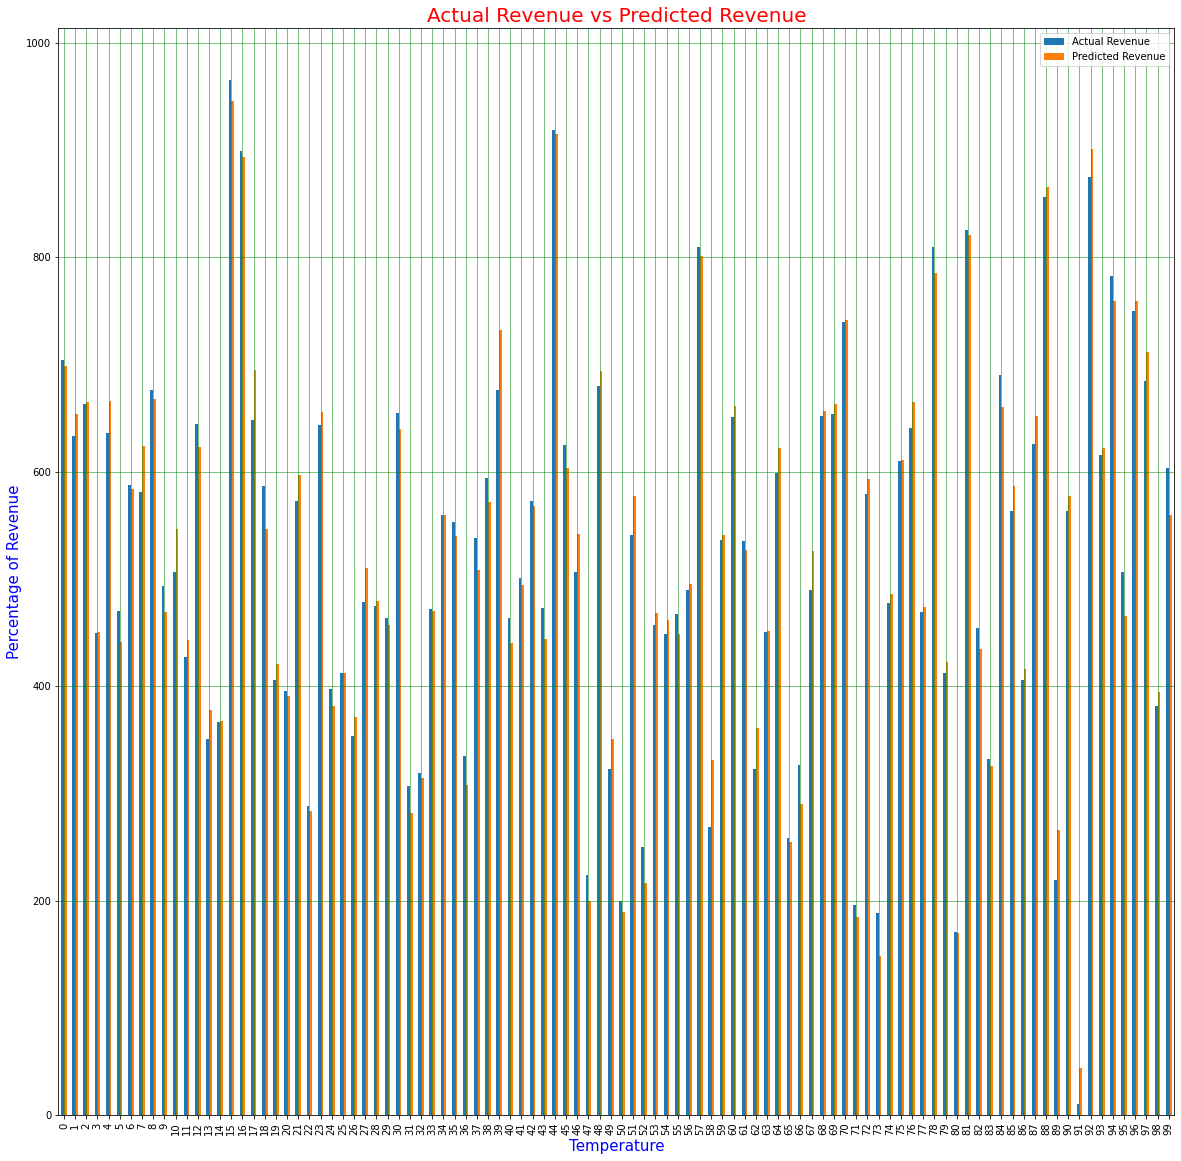

In [33]:
df1.plot(kind = "bar", figsize = (20 , 20) )
plt.grid(which='major', color = "Green" , linewidth = 0.5)
plt.grid(which='minor',  linewidth = 2 )
plt.title('Actual Revenue vs Predicted Revenue', size=20 ,color="Red")
plt.ylabel('Percentage of Revenue', size=15,color="Blue")
plt.xlabel('Temperature', size=15 , color = "Blue")
plt.show()

**Mean of Residuals**


> Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.




In [34]:
y_pred_train = regressor.predict(x_train)
residuals = y_train - y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals = {}".format(mean_residuals))

Mean of Residuals = 3.929301328753354e-14


**The mean of the residuals is so small that we can consider it zero.**

**Check for Homoscedasticity**




> Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.



**Detecting heteroscedasticity!**


> **Graphical Method:** Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.



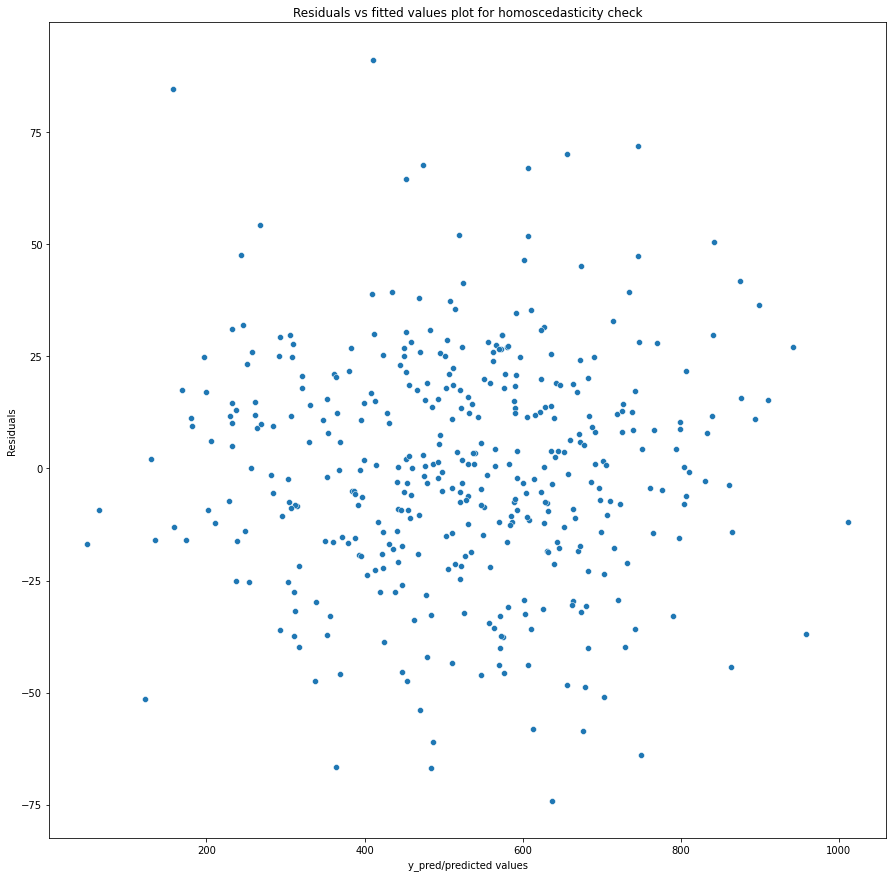

In [35]:
plt.figure(figsize=(15,15))
sns.scatterplot(y_pred_train, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


**From the scatter plot it is clear that there is no specific patters forming. So we can say homoscedasticity is present.**

**Goldfeld Quandt Test**

**Checking heteroscedasticity :** Using Goldfeld Quandt we test for heteroscedasticity.




> **Null Hypothesis:** Error terms are homoscedastic

> **Alternative Hypothesis:** Error terms are heteroscedastic.





In [36]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.194064380988825), ('p-value', 0.10590221974044298)]

Since p value is greater than 0.05 in Goldfeld Quandt Test.
Therefore, we do not reject Null hypothesis.
Hnece, we Conclude that error terms are homoscedastic.





**Check for Normality of error terms/residuals**

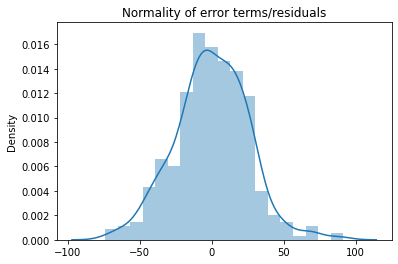

In [37]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**No autocorrelation of residuals**

> When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

> In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

> There should not be autocorrelation in the data so the error terms should not form any pattern.

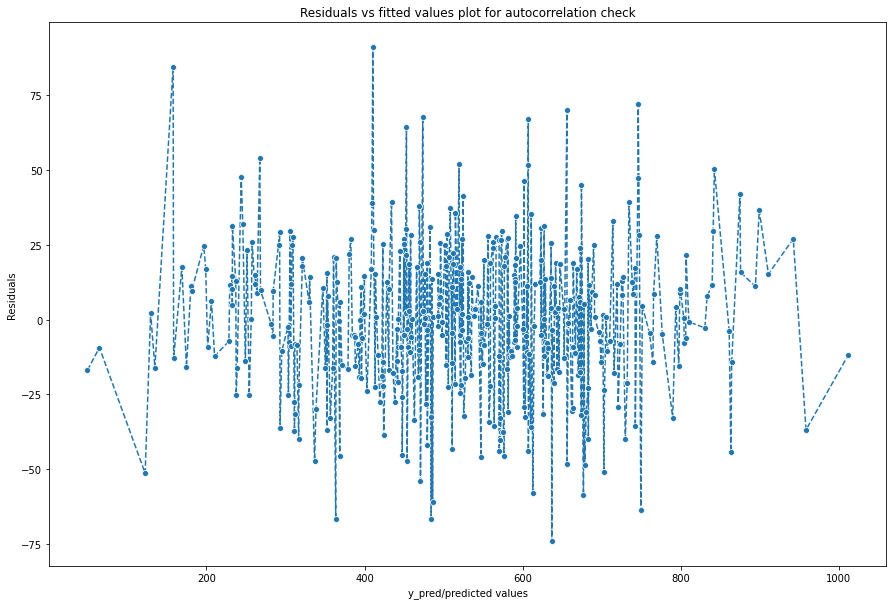

In [38]:
plt.figure(figsize=(15,10))
sns.lineplot(y_pred_train, residuals, marker = 'o', linestyle = '--')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

**Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.**

> **Null Hypothesis:** Autocorrelation is absent.

> **Alternative Hypothesis:** Autocorrelation is present.

In [39]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.19018819503193227

**Since p value is greater than 0.05 we do not reject the null hypothesis that error terms are not autocorrelated.**

**No perfect multicollinearity**

> In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

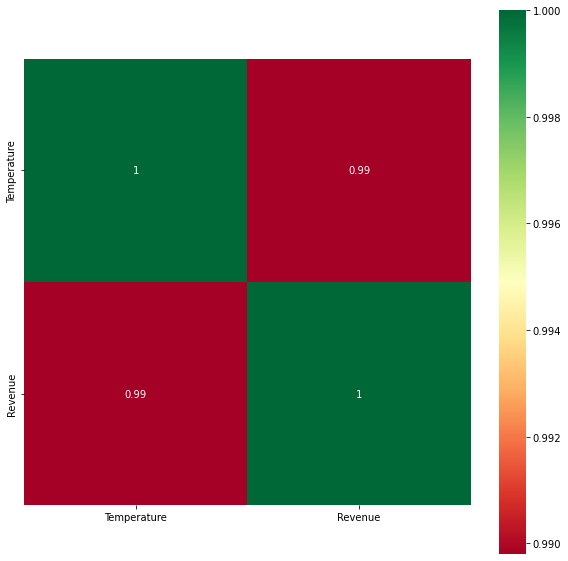

In [40]:
plt.figure(figsize=(10,10))  
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  

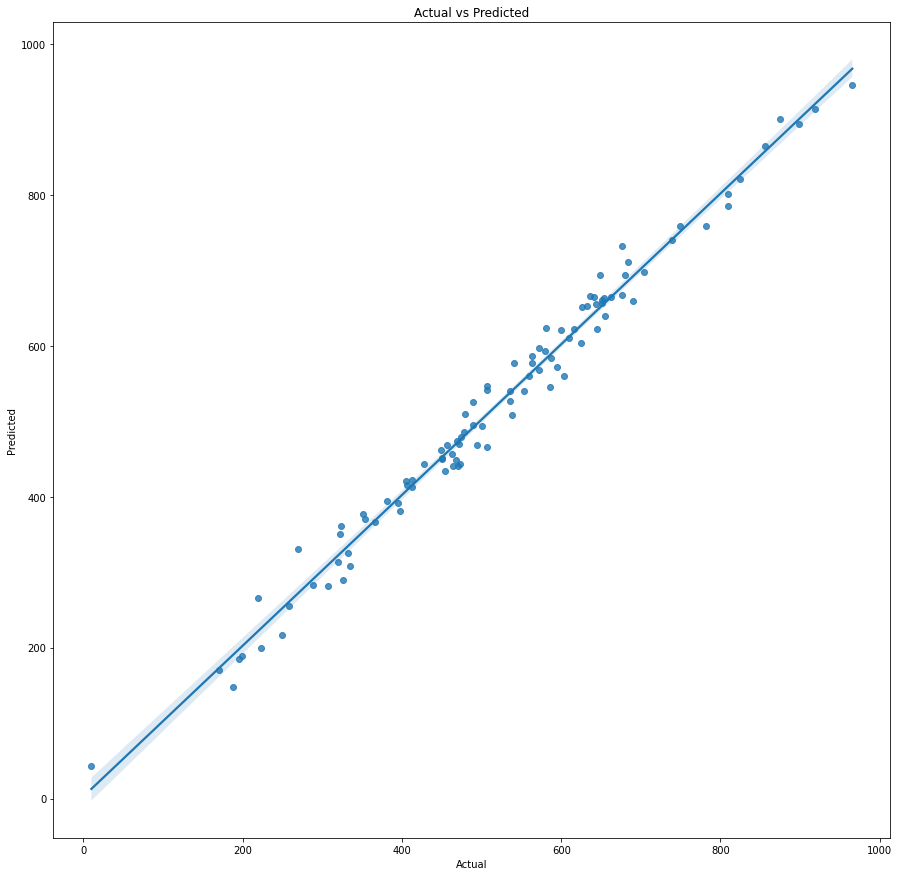

In [54]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, y_predic)
plt.xlabel('Actual')
plt.ylabel('Predicted')
p = plt.title('Actual vs Predicted')

**Model Evaluation**

In [41]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [42]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_predic))
print("MAE:",mse)

MAE: 18.303213530102894


In [43]:
# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_predic)))
print("RMSE:",rmse)

RMSE: 22.98292993619252


In [44]:
# To find coefficient of determination
r2 =  r2_score(y_test, y_predic)
print("R-Square:",r2)

R-Square: 0.9837324255882576


In [45]:
meanAbErr = metrics.mean_absolute_error(y_test, y_predic)
meanSqErr = metrics.mean_squared_error(y_test, y_predic)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predic))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_predic)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percenatge Error:', MAPE)

Mean Absolute Error: 18.303213530102894
Mean Square Error: 528.2150684519343
Root Mean Square Error: 22.98292993619252
Mean Absolute Percenatge Error: 0.07437058453356943


**Decision Tree Regression**

In [46]:
regressor1 = DecisionTreeRegressor()
regressor1.fit(x_train, y_train)

DecisionTreeRegressor()

In [47]:
y_pred1 = regressor.predict(x_test)
regressor1.predict(x_test)

array([690.7892959 , 639.5380115 , 682.8085663 , 475.2133537 ,
       655.6603879 , 427.2113597 , 571.4342569 , 643.6486011 ,
       655.6603879 , 458.860905  , 501.34533   , 443.1136034 ,
       654.1974057 , 362.5152155 , 367.0523757 , 969.2916296 ,
       905.4776043 , 691.9580059 , 501.34533   , 402.7931738 ,
       383.9562396 , 621.9692088 , 278.7319615 , 726.2337713 ,
       402.4553204 , 441.5087331 , 356.0980075 , 505.7438672 ,
       437.2519927 , 459.7353497 , 651.5043041 , 280.5184674 ,
       306.0907189 , 496.0112948 , 578.3604354 , 543.5995933 ,
       319.4029032 , 545.9039291 , 538.31289   , 711.1740653 ,
       437.8287103 , 499.4583433 , 594.3116748 , 467.631063  ,
       926.0671533 , 570.5778753 , 543.5995933 , 216.183462  ,
       691.9580059 , 334.4337199 , 221.400252  , 594.8048712 ,
       198.1215634 , 448.9304429 , 429.4357021 , 402.3984607 ,
       503.0842679 , 809.6720534 , 344.6887652 , 543.5995933 ,
       631.3182368 , 507.900282  , 381.8030138 , 454.18

**Prediction Score**

In [48]:
print("Prediction score = "+ str(round((regressor1.score(x_test,y_test)* 100),2)) + " %")

Prediction score = 96.66 %


Text(0, 0.5, 'Revenue')

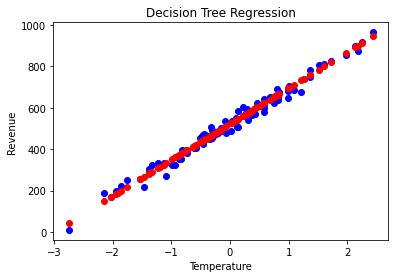

In [49]:
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, y_pred1, color = 'red')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

In [50]:
df2 = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': y_pred1})    
df2

,Actual Revenue,Predicted Revenue
0,704.281439,698.338556
1,632.901914,653.323311
2,662.558990,664.730275
3,449.813300,450.519285
4,636.298374,665.474697
...,...,...
95,506.222379,465.780600
96,749.367154,758.745585
97,684.158444,711.301255
98,381.564135,394.456810


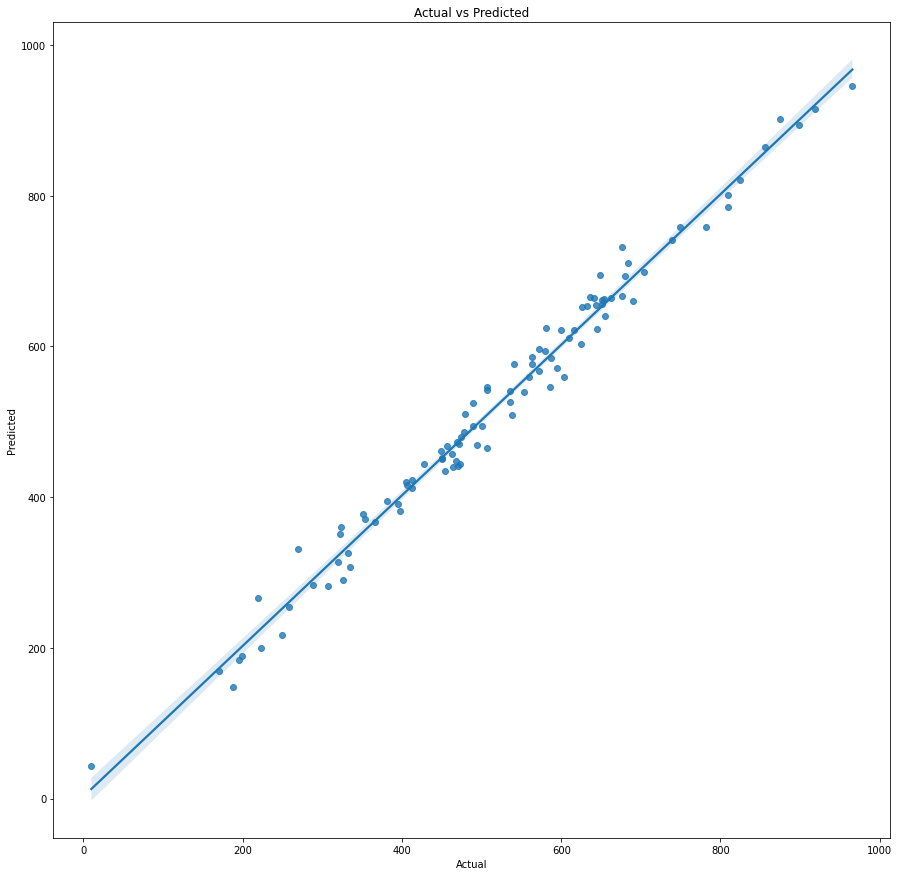

In [55]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
p = plt.title('Actual vs Predicted')

In [51]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred1)
meanSqErr = metrics.mean_squared_error(y_test, y_pred1)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred1)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percenatge Error:', MAPE)

Mean Absolute Error: 18.303213530102894
Mean Square Error: 528.2150684519343
Root Mean Square Error: 22.98292993619252
Mean Absolute Percenatge Error: 0.07437058453356943
